# Heart Disease Risk Analysis
    
The contents of this project are as follows.

1. Objective
2. Introduction to the data
3. Data cleaning and processing
4. Modeling
5. Summary
6. Suggestions

## Objective

The objective of this project is to use deep learning methods to predict whether a person can suffer from a heart attack or not by observing some key health related features. Essentially, this project attempts to classify the patients into groups based on the possible relative likelihood of heart attacks.

## Introduction to the data

The data came from a kaggle data set (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) and contains features related to predicting heart attacks. The following are the features. There are 303 observations and 14 features.

age:  age of the patient

sex:  sex of the patient (1 = male; 0 = female)

exng: exercise induced angina (1 = yes; 0 = no)

cas: number of major vessels colorized by flourosopy (0-3)

cp: chest Pain type 
1. : typical angina
2. : atypical angina
3. : non-anginal pain
4. : asymptomatic

trtbps: resting blood pressure (in mm Hg) on admission

chol: cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
1. 0 = normal
2. 1 = having ST-T wave abnormality
3. 3 = showing probable or definite left ventricular hypertrophy

thalachh: maximum heart rate achieved

oldpeak: ST depression induced by exercise relative to resting

slp: slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

thal: Thalium stress test result (1 = fixed defect; 2 = normal; 3 = reversible defect)

risk: risk of heart attack (0 = less chance of heart attack; 1 = high chance of heart attack)

****************

The **target feature** is **risk**. Therefore, we are attempting to classifiy observations, using neural network methods, based on whether they are likely to have heart attacks or not.

Below, we load some of the essential libraries as well as the data.

In [105]:
import numpy as np
import pandas as pd

data = pd.read_csv('heart.csv')

## Data cleaning and processing


Let us look at the data types.

In [106]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
risk          int64
dtype: object

Based on the above, we see that all the data is in numeric form. Therefore, we do not need to encode them. Let us see whether any data is missing.

In [107]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
risk        0
dtype: int64

No data is missing and therefore, this data set is in a relatively clean state.


### Splitting data

We need to split the data into train and validation (test) set as well as features and target.

In [108]:
from sklearn.model_selection import train_test_split

# Split x and y.
y = data.risk
data.drop(columns='risk', inplace=True)
x = data

# Split the test and validation sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


### Scaling data

Scaling the data is a must for any nueral network based method. In this section we will scale the data.

In [109]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)


## Modeling

The model I use in this project is a **deep neural network** (a vanila neural network without any convolusions or recurrences).

The **variations** will include:

1. Change the number of hidden layers
2. Introduce regularization
3. Change the optimizer
4. Change the activation function

Let us import the required packages and classes.

In [110]:
np.random.seed(1)

import tensorflow as tf
tf.random.set_random_seed(1)

from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
import seaborn as sns

### Neural network 1: basic model

This network has the following strucutre.

Input > Dense layer > Output (binary)

Following are the parameters.

1. Hidden layers: 1
2. Regularization: none
3. Activation: sigmoid
4. Optimization: stochastic gradient descent


In [111]:
nn1 = Sequential([
    Dense(10, input_shape=(13, ), activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

nn1.compile(SGD(learning_rate=.001), 
            loss='binary_crossentropy', metrics=['accuracy'])


Let us train the model for 750 epochs.

In [112]:
%%capture

# Fit.
nn1_hist = nn1.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   epochs=750)


Let us plot the training and validation losses for the model.

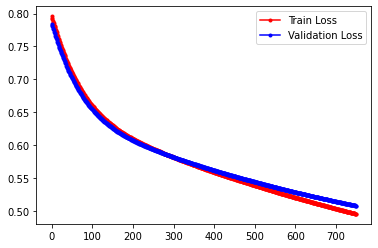

In [113]:
fig, ax = plt.subplots()
ax.plot(nn1_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn1_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


It appears that the model performs the same for both sets. However, it appears the model would benefit from further training. 

Let us train for 1500 epochs.

In [114]:
%%capture

nn1_hist2 = nn1.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=1500)

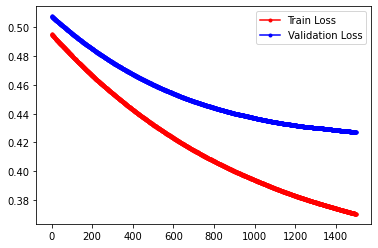

In [115]:
fig, ax = plt.subplots()
ax.plot(nn1_hist2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn1_hist2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


As the number of epochs increases, the difference between training and validation loss increases. The validation loss is too large.

### Neural network 2: increasing the number of hidden layers

Following are the parameters of this model.

1. Hidden layers: 2
2. Regularization: none
3. Activation: sigmoid
4. Optimization: stochastic gradient descent

In [121]:
nn2 = Sequential([
    Dense(10, input_shape=(13, ), activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

nn2.compile(SGD(learning_rate=.001), 
            loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
%%capture

# Fit.
nn2_hist = nn2.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   epochs=750)

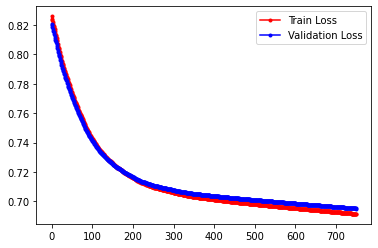

In [123]:
fig, ax = plt.subplots()
ax.plot(nn2_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn2_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


Let us try training further.

In [124]:
%%capture
nn2_hist2 = nn2.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=1500)

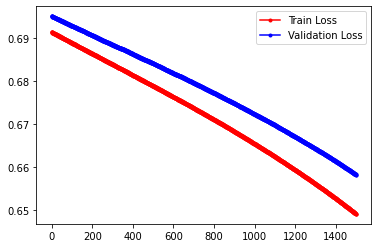

In [125]:
fig, ax = plt.subplots()
ax.plot(nn2_hist2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn2_hist2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


It appears we are overfitting. Therefore, let us try chaning the activation function.

### Neural network 3: ReLu as the activation function

Network parameters are as follows.

1. Hidden layers: 2
2. Regularization: none
3. Activation: ReLu
4. Optimization: stochastic gradient descent


In [128]:
nn3 = Sequential([
    Dense(10, input_shape=(13, ), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn3.compile(SGD(learning_rate=.001), 
            loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
%%capture

# Fit.
nn3_hist = nn3.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   epochs=750)

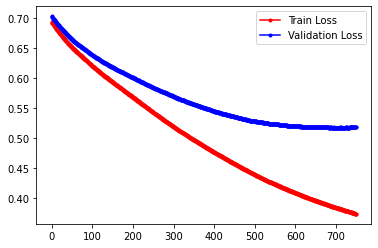

In [130]:
fig, ax = plt.subplots()
ax.plot(nn3_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn3_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


It is very clear that we are overfitting because the training loss is much lower than the validation loss. We need to use regularization.


### Neural network 4: dropout regularization

Parameters are as follows:

1. Hidden layers: 2
2. Regularization: Dropout
3. Activation: ReLu
4. Optimization: stochastic gradient descent

In [151]:
%%capture

nn4 = Sequential([
    Dense(10, input_shape=(13, ), activation='relu'),
    Dropout(0.25),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn4.compile(SGD(learning_rate=.001), 
            loss='binary_crossentropy', metrics=['accuracy'])

# Fit.
nn4_hist = nn4.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   epochs=1500)

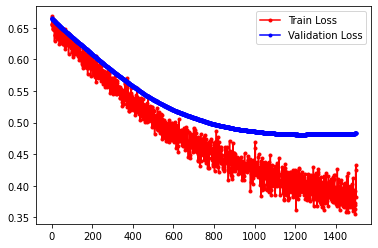

In [152]:
fig, ax = plt.subplots()
ax.plot(nn4_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(nn4_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


This does not appear to have solved the problem. 


### Neural network 5: Adam optimizer

We shall use 'adam' as the optimizer. The parameters are as follows.

1. Hidden layers: 2
2. Regularization: Dropout
3. Activation: ReLu
4. Optimization: adam


In [212]:
%%capture

nn5 = Sequential([
    Dense(10, input_shape=(13, ), activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn5.compile(Adam(learning_rate=.0001), 
            loss='binary_crossentropy', metrics=['accuracy'])

# Fit.
nn5_hist = nn5.fit(x_train, y_train, validation_data=(x_test, y_test), 
                   epochs=600)

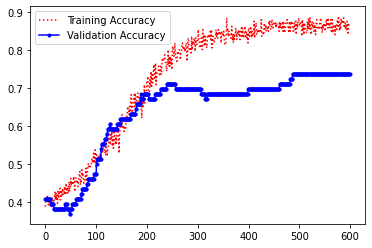

In [215]:
fig, ax = plt.subplots()
ax.plot(nn5_hist.history["acc"],'r', linestyle=':', label="Training Accuracy")
ax.plot(nn5_hist.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend();

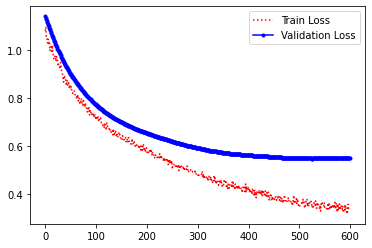

In [214]:
fig, ax = plt.subplots()
ax.plot(nn5_hist.history["loss"],'r', linestyle=':', label="Train Loss")
ax.plot(nn5_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend();


## Summary

Network 2 with about 250 epochs of training provided the best agreement in terms of training and testing loss compatibilitiy. Regularization (dropout) was able to lower the gap to some extent. Changing the optimizer did not aid in solving the problems.

Therefore, network 2 is the best model based on this short project.

## Suggestions

None of the models were ables to provide a suitable compatible training and validation accuracy. It appears, a neural network based approach for this data set is an overkill. Therefore, sticking to classification based methods seems better. 

The test set seems too small and if we could increase the entire data set, it would be much better.